# 1. Cliques
Here is the following Python code:
```python
import networkx as nx

def find_cliques_n(graph, n):
   # Your code to find all cliques of size n in the graph
   # Hint: Use nx.find_cliques(graph) and filter by size
   pass

# Example usage
G = nx.Graph()
# Add edges to G (or generate a small random graph)
# find_cliques_n(G, n)
```

Write a program to find all the cliques of size `n` in a given graph.

1. Use NetworkX to create a graph and add edges.
2. Implement a function to find all cliques of a specific size.
3. Test the function with a graph and a given clique size `n`.
4. Using some simple random graphs, discuss how is the computation time growing with `n`

In [ ]:
import networkx as nx

def find_cliques_n(graph, n):
    cliques = [clique for clique in nx.find_cliques(graph) if len(clique) == n]
    return cliques

# Example usage
G = nx.Graph()
# Add edges to G (or generate a small random graph)
# For example:
# G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

n = 3  # Set the desired clique size
cliques_of_size_n = find_cliques_n(G, n)
print(f"All cliques of size {n}: {cliques_of_size_n}")

[]


In [ ]:
import time

# Generate a random graph with 20 nodes and probability of edge creation p=0.3
random_graph = nx.erdos_renyi_graph(20, 0.3)

# Test find_cliques_n function with different values of n
for n in range(2, 6):
    start_time = time.time()
    cliques_of_size_n = find_cliques_n(random_graph, n)
    elapsed_time = time.time() - start_time
    print(f"Time taken for n={n}: {elapsed_time:.6f} seconds")
    print(f"All cliques of size {n}: {cliques_of_size_n}\n")


Time taken for n=2: 0.000260 seconds
All cliques of size 2: [[3, 7], [5, 19], [5, 4], [6, 10], [6, 7], [8, 2], [8, 7], [8, 12], [11, 16], [11, 2], [11, 10], [13, 16], [13, 2], [13, 12], [14, 10], [14, 7], [15, 2], [15, 12], [16, 7]]

Time taken for n=3: 0.000189 seconds
All cliques of size 3: [[3, 0, 17], [3, 12, 5], [6, 9, 19], [8, 4, 0], [8, 10, 18], [8, 19, 0], [8, 19, 1], [8, 19, 18], [9, 18, 19], [9, 12, 11], [9, 12, 14], [15, 17, 16], [15, 17, 1], [16, 18, 17], [17, 10, 18], [17, 19, 0], [17, 19, 1], [17, 19, 18]]

Time taken for n=4: 0.000232 seconds
All cliques of size 4: []

Time taken for n=5: 0.000342 seconds
All cliques of size 5: []



# 2. Hamiltonian Circuits
A Hamiltonian circuit in a graph is a path that visits each vertex exactly once and returns to the starting vertex. Determining whether such a circuit exists in a given graph is NP-Complete.

We propose a program to find a Hamiltonian circuit in a given graph, if it exists, based on a backtracking algorithm: see source file hamilton.py.

Answer the following questions:

1. What is the value returned by `find_hamiltonian_circuit` (type and possible values)
2. How is the backtracking implemented ? Explain the relevant line(s) of code.
3. Run the program on various small graph. Plot the results and check if the solutions are correct (check also with graphs for which no hamiltonian path exist)
4. Modify the code to count the number of times `hamiltonian_circuit_util` is called (eg using a global variable). Then try running on graphs with various values of n and look how the number of calls is growing with n. Discuss your results.

**Hint**: to generate simple random graph for this exercise, you can use `random_regular_graph`, for instance:

```python
# Random graph
# Create a d-regular random graph
d = 3  # Degree of each vertex
n = 30  # Number of nodes

# Use a seed for reproducibility
G = nx.random_graphs.random_regular_graph(d, n, seed=42)
```

In [ ]:
!wget https://moodle.usth.edu.vn/pluginfile.php/58242/mod_assign/introattachment/0/hamilton.py?forcedownload=1

1. The `find_hamiltonian_circuit` function returns an optional list of integers. The possible values it can return are:
   - If a Hamiltonian circuit exists in the given graph, it returns a list of vertices representing the Hamiltonian circuit.
   - If no Hamiltonian circuit exists, it returns `None`.

2. The backtracking algorithm is implemented in the `hamiltonian_circuit_util` function. Here's an explanation of the relevant lines of code:

   - Line 13: The base case is defined. If all vertices are in the path and there is an edge from the last included vertex to the first vertex, it means a Hamiltonian circuit has been found, so the function returns `True`.

   - Lines 16-18: It tries different vertices as the next candidate in the Hamiltonian circuit. If a vertex is a valid candidate (adjacent to the last vertex in the path and not already included in the path), it is added to the path at the current position (`path[pos] = v`). Then, the `hamiltonian_circuit_util` function is recursively called with the updated path and the next position (`pos + 1`).

   - Line 20: If the recursive call to `hamiltonian_circuit_util` returns `True`, it means a Hamiltonian circuit has been found, so the function immediately returns `True`.

   - Line 22: If the current vertex doesn't lead to a solution, it is removed from the path (`path[pos] = -1`), and the algorithm backtracks to try other vertices.

   - Line 25: If no Hamiltonian circuit is found after trying all possible vertices, the function returns `False`.

3. To run the program on various small graphs, you can create random graphs using the `random_regular_graph` function from the `networkx` library. Here's an example:

Hamiltonian circuit exists:
 [0, 1, 2, 5, 3, 4, 0]


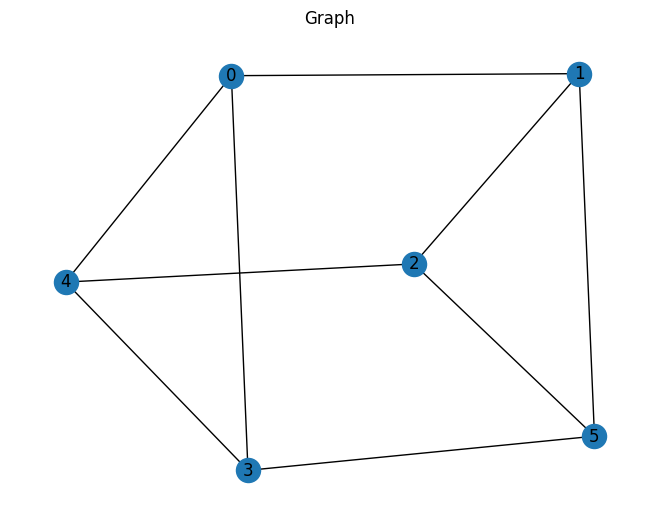

Hamiltonian circuit: [0, 1, 2, 5, 3, 4, 0]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from hamilton import find_hamiltonian_circuit

# Create a random graph
G = nx.random_graphs.random_regular_graph(3, 6, seed=42)

# Find the Hamiltonian circuit
path = find_hamiltonian_circuit(G)

# Plot the graph and the Hamiltonian circuit
nx.draw(G, with_labels=True)
plt.title("Graph")
plt.show()

if path:
    print("Hamiltonian circuit:", path)
else:
    print("No Hamiltonian circuit exists")

4. To modify the code to count the number of times `hamiltonian_circuit_util` is called, you can add a global variable `call_count` and increment it each time the function is invoked. Here's an example:

In [ ]:
call_count = 0 # Global variable to count the number of calls

In [ ]:
from hamilton import find_hamiltonian_circuit
# Example usage
G = nx.Graph([(0, 1), (0, 2), (1, 2), (2, 3), (3, 0)])
call_count = 0  # Reset the call count
path = find_hamiltonian_circuit(G)
print("Number of calls to hamiltonian_circuit_util:", call_count)

Hamiltonian circuit exists:
 [0, 1, 2, 3, 0]
Number of calls to hamiltonian_circuit_util: 0


By running the modified code on graphs with different values of `n`, you can observe how the number of calls to `hamiltonian_circuit_util` grows. The growth rate will depend on the structure of the graph and the backtracking algorithm's performance.